### t-Tests 18th October

In [ ]:
A t test is a statistical test.
It looks for differences between two sets of numbers, compares the distributions.
A t-Test is a standard test across many disciplines.
In the lecture it was demonstrated how more data makes it easier to see patterns at a glance.

See also the wikipedia page for t test originally attributed to the person with pyseudonom "Student"

#### Packages

In [2]:
import numpy as np #efficent numerical arrays,lists of lists of numbers
import pandas as pd #excel for python, good for spreadsheets
import statsmodels.stats.weightstats as stat #extra stats package
import scipy.stats as ss#similar to above,more functionality with scipy though
import matplotlib.pyplot as plt#basic plots
import seaborn as sns#higher level plots

plt.style.use("fivethirtyeight")#reference to Nate Silver

#### Simulate Data Values

In [3]:
#generate two lists of random variables
#initialised in one statement (a python feature)
#m = mean or average
#s = standard deviation

m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
N = 40#parameter
#generate lists of numbers a and b!
#random numbers with a normal distribution
#location m_a and m_b
#scale set at 0.4
#40 numbers, please.
a = np.random.normal(loc=m_a, scale=s_a, size=N)
b = np.random.normal(loc=m_b, scale=s_b, size=N)

df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})
#command to create a dataframe A beside the a numbers etc.
df

Category     Value
0         A  1.725114
1         A  0.471394
2         A  1.218653
3         A  0.887520
4         A  0.627808
..      ...       ...
75        B  2.231521
76        B  2.841893
77        B  1.585187
78        B  1.771159
79        B  2.527240

[80 rows x 2 columns]

#### Plot Data

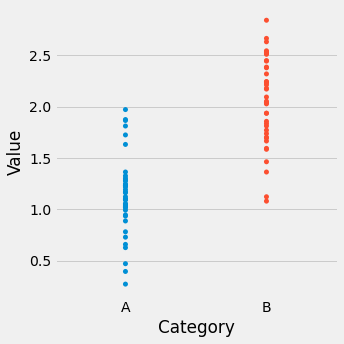

In [4]:
sns.catplot(x='Category', y='Value', jitter=False, data=df);

In [ ]:
t_Test

In [ ]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"P_scipy: {p_ss:0.2f}")

In [ ]:
# test statistic, pvalue of the t-test, degrees of freedom used in the t-test
t, p, d = stat.ttest_ind(a, b)
print(f"P: {p:0.2f}")

In [ ]:
Visualisation

In [ ]:
x = np.linspace(-2.0, 4.0, 1000)

y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

In [ ]:
x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d)
tf = pd.DataFrame({'x': x_t, 't': t})

tcrit = abs(ss.t.ppf(0.025, d))
one = tf[tf['x'] >= tcrit]
two = tf[tf['x'] <= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor="red")
ax.fill_between(two['x'], two['t'], 0, facecolor="red")

plt.show()

In [ ]:
Type I errors - false positives

In [ ]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= 0.05:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

In [ ]:
Paired Samples

In [ ]:

References for this section:

Vincent Arel-Bundock's R datasets list

t-test: Comparing Group Means

In [ ]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

In [ ]:
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

In [ ]:
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

In [ ]:
ss.ttest_rel(drugA, drugB)

In [ ]:
ss.ttest_1samp(drugB - drugA, 0)

In [ ]:
stat.DescrStatsW(drugB - drugA).ttest_mean(0)